# To Produce Small Data File

In [8]:
import os
import sys
sys.path.append("../src")
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from das_util import compute_misfit, get_tstamp
from scipy.ndimage import gaussian_filter1d, gaussian_filter
from scipy.interpolate import interp1d

matplotlib.rcParams.update({'font.size': 16})
plt.rcParams['font.family'] = 'Helvetica'

data_dir='../../../data_farm/data/'
save_dir='../data/'

psd_data = os.path.join(data_dir, 'psd_all.hdf5')
acf_data = os.path.join(data_dir, 'autocorr_15_60Hz.hdf5')
acf_data_stretched = os.path.join(data_dir, 'autocorr_15_60Hz_stretched.hdf5')
acf_data_stretchedx2 = os.path.join(data_dir, 'autocorr_15_60Hz_stretchedx2.hdf5')
acf_data_stretchedx3 = os.path.join(data_dir, 'autocorr_15_60Hz_stretchedx3.hdf5')
harper_met = os.path.join(data_dir, 'NewportSalop_merged.csv')
reg_met = os.path.join(data_dir, 'met_newport.csv')
spatial_data = os.path.join(data_dir, 'interp_dv_tillage_tire.csv')
phy_data = os.path.join(data_dir, 'Soil_phy.csv')
phy_data_interpolate = os.path.join(data_dir, 'interpolated_soil_phy.csv')

freqmin=25
freqmax=50
samp_freq = 500
dchan = 3.19

## ACFs (H5)
Raw, strected, stretchedx2, stretchedx3 

In [2]:
### Read big h5 files
with h5py.File(acf_data, 'r') as f:
    corr_all_time_ch18 = f['autocorr'][18, :, 2500:3000, 0]
    corr_all_time_ch33 = f['autocorr'][33, :, 2500:3000, 0]
    corr_all_time_ch44 = f['autocorr'][44, :, 2500:3000, 0]
    corr_all_channel_30_40min = f['autocorr'][:50, 30:40, 2500:2700, 0]
with h5py.File(acf_data_stretched, 'r') as f:
    corr_all_time_stretched1_ch18 = f['autocorr'][18, :, :500]
    corr_all_time_stretched1_ch33 = f['autocorr'][33, :, :500]
    corr_all_time_stretched1_ch44 = f['autocorr'][44, :, :500]
with h5py.File(acf_data_stretchedx2, 'r') as f:
    corr_all_time_stretched2_ch18 = f['autocorr'][18, :, :500]
    corr_all_time_stretched2_ch33 = f['autocorr'][33, :, :500]
    corr_all_time_stretched2_ch44 = f['autocorr'][44, :, :500]
with h5py.File(acf_data_stretchedx3, 'r') as f:
    corr_all_time_stretched3_ch18 = f['autocorr'][18, :, :500]
    corr_all_time_stretched3_ch33 = f['autocorr'][33, :, :500]
    corr_all_time_stretched3_ch44 = f['autocorr'][44, :, :500]

### Save small h5 files
with h5py.File(os.path.join(save_dir, 'autocorr_15_60Hz_3chs500pts.hdf5'), 'w') as f:
    f.create_dataset('corr_all_time_ch18', data=corr_all_time_ch18)
    f.create_dataset('corr_all_time_ch33', data=corr_all_time_ch33)
    f.create_dataset('corr_all_time_ch44', data=corr_all_time_ch44)
    f.create_dataset('corr_all_time_stretched1_ch18', data=corr_all_time_stretched1_ch18)
    f.create_dataset('corr_all_time_stretched1_ch33', data=corr_all_time_stretched1_ch33)
    f.create_dataset('corr_all_time_stretched1_ch44', data=corr_all_time_stretched1_ch44)
    f.create_dataset('corr_all_time_stretched2_ch18', data=corr_all_time_stretched2_ch18)
    f.create_dataset('corr_all_time_stretched2_ch33', data=corr_all_time_stretched2_ch33)
    f.create_dataset('corr_all_time_stretched2_ch44', data=corr_all_time_stretched2_ch44)
    f.create_dataset('corr_all_time_stretched3_ch18', data=corr_all_time_stretched3_ch18)
    f.create_dataset('corr_all_time_stretched3_ch33', data=corr_all_time_stretched3_ch33)
    f.create_dataset('corr_all_time_stretched3_ch44', data=corr_all_time_stretched3_ch44)

with h5py.File(os.path.join(save_dir, 'autocorr_15_60Hz_30_40min.hdf5'), 'w') as f:
    f.create_dataset('corr_all_channel_30_40min', data=corr_all_channel_30_40min)


### compare raw and stretched ACFs

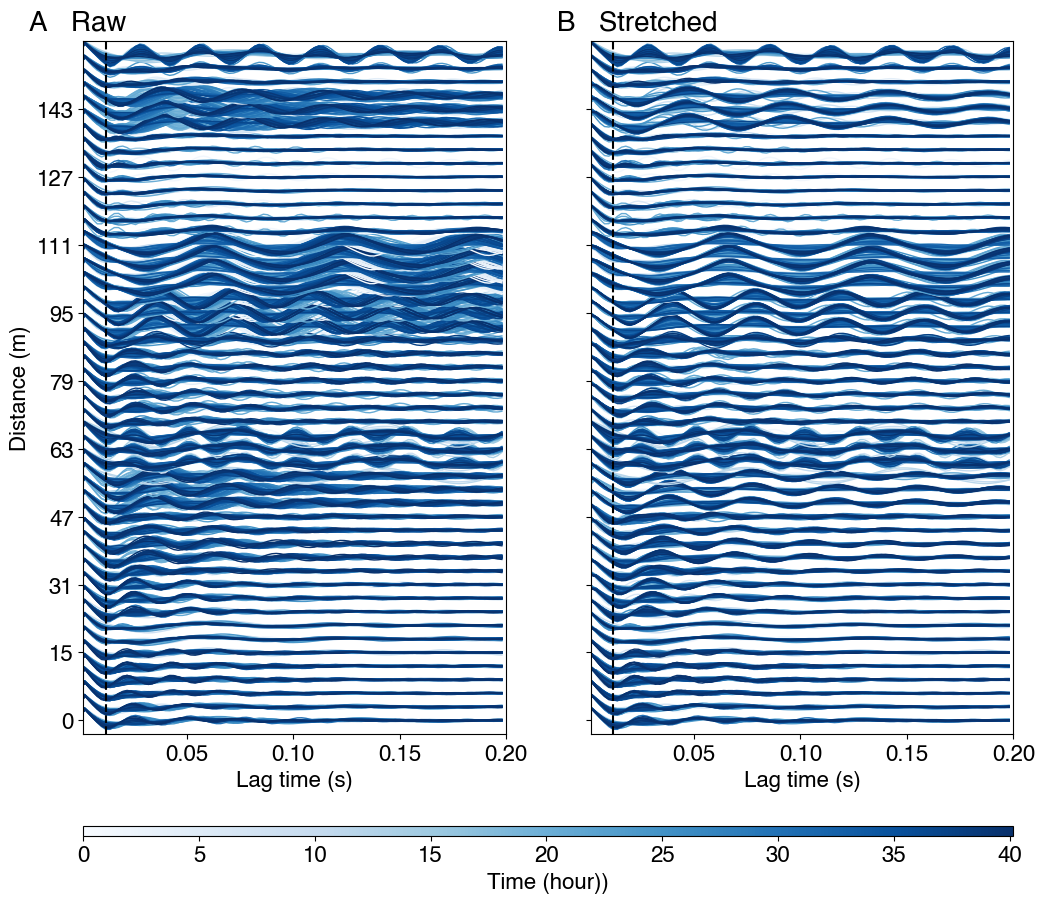

In [69]:
samp_freq = 500
win_st = int(0.012*samp_freq)

with h5py.File(acf_data, 'r') as f:
    corr_all_time = f['autocorr'][:, :, 2500:2600, 0]
with h5py.File(acf_data_stretchedx3, 'r') as f:
    corr_all_time_stretched3 = f['autocorr'][:, :, :100]
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12), sharey=True)
ax1.set_xlim(0.0015, 0.2)
ax1.set_ylim(-1, 50)
ax1.set_ylabel('Distance (m)')
ax1.set_xlabel('Lag time (s)')
ax2.set_xlim(0.0015, 0.2)
ax2.set_ylim(-1, 50)
ax2.set_xlabel('Lag time (s)')

for iloc in np.arange(0,50,1):
    data_plot1=corr_all_time[iloc].T
    data_plot2=corr_all_time_stretched3[iloc].T
    x=np.arange(data_plot1.shape[1])
    y=np.arange(data_plot1.shape[0])


    
    for i in x[::5]:
        ax1.plot(y/samp_freq, data_plot1[:,i]*1.2+iloc, color=plt.cm.Blues(i / len(x)), lw=1)
        ax2.plot(y/samp_freq, data_plot2[:,i]*1.2+iloc, color=plt.cm.Blues(i / len(x)), lw=1)

    
ax1.axvline(x=win_st/samp_freq, color='k', linestyle='--')
ax2.axvline(x=win_st/samp_freq, color='k', linestyle='--')
ax1.set_yticks(np.arange(0,50,5)) 
ax1.set_yticklabels((np.arange(0,50,5)*3.19).astype(int))
ax2.set_yticks(np.arange(0,50,5)) 
ax2.set_yticklabels((np.arange(0,50,5)*3.19).astype(int))

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=0, vmax=len(x)/12))
sm.set_array([])
cbar = plt.colorbar(sm, ax=[ax1, ax2], aspect=100, orientation='horizontal', pad=0.1)
cbar.set_label('Time (hour))')

fig.text(0.08, 0.89, 'A   Raw', fontsize=20)
fig.text(0.52, 0.89, 'B   Stretched', fontsize=20)

plt.savefig(os.path.join(save_dir, 'ACFs_all.pdf'), dpi=300)

## dVV (H5)

In [2]:
### Iteration 1
with h5py.File(os.path.join(data_dir, 'final_peaks_interp_smooth_15_60Hz.h5'), 'r') as f:
    stretch_ratio = f['final_peaks'][:]

## de ratio using the humidist time period
deratio_dvv = stretch_ratio / np.repeat(np.mean(stretch_ratio[:,300:315], axis=1)[:, np.newaxis], 482, axis=1) - 1

with h5py.File(os.path.join(save_dir, 'final_peaks_deRatio.h5'), 'w') as f:
    f.create_dataset('deratio_dvv', data=deratio_dvv)


### Iteration 2
with h5py.File(os.path.join(data_dir, 'final_peaks_15_60Hz_2nd_iteration.h5'), 'r') as f:
    stretch_ratio = f['final_peaks'][:50]
stretch_ratio[stretch_ratio<0.75] = 0.75

## de ratio using the humidist time period
stretch_ratio = stretch_ratio / np.repeat(np.mean(stretch_ratio[:, 300:315], axis=1)[:, np.newaxis], 482, axis=1)

stretch_ratio[np.isnan(stretch_ratio)] = 1

deratio_dvv = (deratio_dvv + 1) * stretch_ratio - 1

with h5py.File(os.path.join(save_dir, 'final_peaks_deRatio_2iterations.h5'), 'w') as f:
    f.create_dataset('deratio_dvv', data=deratio_dvv)


### Iteration 3
with h5py.File(os.path.join(data_dir, 'final_peaks_15_60Hz_3rd_iteration.h5'), 'r') as f:
    stretch_ratio = f['final_peaks'][:50]

## de ratio using the humidist time period
stretch_ratio = stretch_ratio / np.repeat(np.mean(stretch_ratio[:, 300:315], axis=1)[:, np.newaxis], 482, axis=1)

stretch_ratio[np.isnan(stretch_ratio)] = 1

deratio_dvv = (deratio_dvv + 1) * stretch_ratio - 1

with h5py.File(os.path.join(save_dir, 'final_peaks_deRatio_3iterations.h5'), 'w') as f:
    f.create_dataset('deratio_dvv', data=deratio_dvv)

## Stretched ACFs

In [ ]:
# all_ratio = deratio_dvv + 1

# shape_3d = (corr_all_time.shape[0], corr_all_time.shape[1], int(corr_all_time.shape[2]*all_ratio.max())+1)
# corr_all_time_stretched =  np.zeros(shape_3d, dtype=np.float32)

# for iloc in range(50):
#     for itime in range(482):
#         ratio = all_ratio[iloc, itime]
#         tmp = zoom(corr_all_time[iloc, itime], ratio, order=1)
#         corr_all_time_stretched[iloc, itime, :len(tmp)] = tmp 
    
    # plt.figure(figsize = (12, 5))
    # plt.imshow(corr_all_time_stretched[iloc, :, :500].T, aspect='auto', vmin=-0.2, vmax=0.2, cmap='RdBu', origin='lower')

    # plt.xlabel("ACF time (x 5 minutes)", fontsize = 16)
    # plt.ylabel("Time lag (sec)", fontsize = 16)
    # bar = plt.colorbar()
    # bar.set_label('Auto-correlation Coefficient', fontsize = 15)

### stack strected ACF for a static GF
# mean_acf = np.mean(corr_all_time_stretched, axis=1)


# ### Save the stretched ACF
# with h5py.File('data/autocorr_15_60Hz_stretchedx3.hdf5', 'w') as f:
#     f.create_dataset('autocorr', data=corr_all_time_stretched)
#     f.create_dataset('mean_acf', data=mean_acf)

## PSD

In [5]:
### PSD of high frequency DAS
with h5py.File(psd_data, 'r') as f:
    freq = f['frequency'][:]
    file_list = f['daslist'][:]
    PSD_all_time = f['psd_all_time'][:]
    
acqu_time = np.array([get_tstamp(i) for i in file_list.astype('U')])

## Index on the hour
hourly_index = [67,127,187,247,299,359,419,466,526,586,646,706,766,826,886,946,1003,1063,1123,
         1183,1243,1302,1362,1422,1482,1542,1599,1659,1719,1779,1839,1899,1959,2019,
         2078,2138,2198,2258,2318]

## Mean PSD over channels
ave_psd=np.mean(np.sum(PSD_all_time[0:44, :, 52:90], axis=-1) * (freq[1]-freq[0]), axis=0) - 0.0007

In [7]:
freq[52], freq[90], PSD_all_time.shape

(81.25, 140.625, (51, 2408, 129))

In [18]:
int_PSD=np.sum(PSD_all_time[:, :, 52:90], axis=-1) * (freq[1]-freq[0])* 3
int_PSD=gaussian_filter1d(int_PSD, 4, axis=0) - 0.003

### Save small h5
with h5py.File(os.path.join(save_dir, 'integrated_psd.hdf5'), 'w') as f:
    f.create_dataset('int_PSD', data=int_PSD)
    f.create_dataset('freq', data=freq)
    f.create_dataset('file_list', data=file_list)

## Soil physical data

In [15]:
### Read
phy_paras = pd.read_csv(os.path.join(data_dir, 'Soil_phy.csv'))

phy_1 = phy_paras.loc[phy_paras['Plot'].between(1,9)]
phy_2 = phy_paras.loc[phy_paras['Plot'].between(10,18)]
phy_3 = phy_paras.loc[phy_paras['Plot'].between(19,27)]

phy_1['ind'] = 36 - phy_1['Plot'] 
phy_2['ind'] = 33 - phy_2['Plot']
phy_3['ind'] = 30 - phy_3['Plot']

phy_all = pd.concat([phy_1, phy_2, phy_3])
phy_10cm = phy_all.loc[phy_all['Depth (cm)'] == 10]
phy_20cm = phy_all.loc[phy_all['Depth (cm)'] == 20]
phy_30cm = phy_all.loc[phy_all['Depth (cm)'] == 30]


#### Interpolate porosity and bulk density
f = interp1d(np.array(phy_30cm['ind'])*4-3.3, np.array(phy_30cm['Porosity (%)']), bounds_error=False, fill_value=48)
interp_porosity_30cm = f(np.arange(50)*3.19)

f = interp1d(np.array(phy_20cm['ind'])*4-3.3, np.array(phy_20cm['Porosity (%)']), bounds_error=False, fill_value=48)
interp_porosity_20cm = f(np.arange(50)*3.19)

f = interp1d(np.array(phy_10cm['ind'])*4-3.3, np.array(phy_10cm['Porosity (%)']), bounds_error=False, fill_value=48)
interp_porosity_10cm = f(np.arange(50)*3.19)

f = interp1d(np.array(phy_30cm['ind'])*4-3.3, np.array(phy_30cm['Dry Bulk density (g/cm3)']), bounds_error=False, fill_value=1.35)
interp_bulk_density_30cm = f(np.arange(50)*3.19)

f = interp1d(np.array(phy_20cm['ind'])*4-3.3, np.array(phy_20cm['Dry Bulk density (g/cm3)']), bounds_error=False, fill_value=1.35)
interp_bulk_density_20cm = f(np.arange(50)*3.19)

f = interp1d(np.array(phy_10cm['ind'])*4-3.3, np.array(phy_10cm['Dry Bulk density (g/cm3)']), bounds_error=False, fill_value=1.35)   
interp_bulk_density_10cm = f(np.arange(50)*3.19)

interp_data = pd.DataFrame({
    'distance (m)': np.arange(50) * 3.19,
    'interp_porosity_10cm': interp_porosity_10cm,
    'interp_porosity_20cm': interp_porosity_20cm,
    'interp_porosity_30cm': interp_porosity_30cm,
    'interp_bulk_density_10cm': interp_bulk_density_10cm,
    'interp_bulk_density_20cm': interp_bulk_density_20cm,
    'interp_bulk_density_30cm': interp_bulk_density_30cm
})
### Save
interp_data.to_csv(os.path.join(save_dir, 'interpolated_soil_phy.csv'), index=False)

/var/folders/94/_f91r5t1277f16yl_03mnxkw0000gn/T/ipykernel_59321/2840630756.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phy_1['ind'] = 36 - phy_1['Plot']
/var/folders/94/_f91r5t1277f16yl_03mnxkw0000gn/T/ipykernel_59321/2840630756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phy_2['ind'] = 33 - phy_2['Plot']
/var/folders/94/_f91r5t1277f16yl_03mnxkw0000gn/T/ipykernel_59321/2840630756.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo